# Project Goal
In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, a significant amount of typically confidential information entered into the public record, including tens of thousands of emails and detailed financial data for top executives. 

The goal of this project is to build a person-of-interest identifier based on financial and email data made public as a result of the Enron scandal.  

# The Enron Scandal
Enron Corporation was an American energy, commodities, and services company based in Houston, Texas. It was founded in 1985 as a merger between Houston Natural Gas and InterNorth, both relatively small regional companies. Before its bankruptcy on December 3, 2001, Enron employed approximately 29,000 staff and was a major electricity, natural gas, communications and pulp and paper company, with claimed revenues of nearly $101 billion during 2000. Fortune named Enron "America's Most Innovative Company" for six consecutive years.

At the end of 2001, it was revealed that Enron's reported financial condition was sustained by an institutionalized, systemic and creatively planned accounting fraud, known since as the Enron scandal. Enron has since become a well-known example of willful corporate fraud and corruption. The scandal also brought into question the accounting practices and activities of many corporations in the United States and was a factor in the enactment of the Sarbanes–Oxley Act of 2002. The scandal also affected the greater business world by causing the dissolution of the Arthur Andersen accounting firm, which had been Enron's main auditor for years.

# Data Exploration
The Enron Scandal dataset consists of 146 data points of which 128 are non-POIs and 18 are POIs.

```python
len(data_dict)
146

count_of_nonpoi, count_of_poi = df.groupby('poi')['email_address'].count().tolist()
128, 18
```

There are a total of 20 features and one label (POI).  The features in the dataset are composed of financial features such as bonuses, exercised stock options, and deferred income as well as email communications metadata like messages to a POI or messages from a POI.  

```python
len(df.columns)
21

df.columns.tolist()
['bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'email_address',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'poi',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']
```

The term POI, or person of interest is defined as a person who has been formally accused or charged or settled without admitting guilt in exchange for testimony.  The features have a broad range in their degree of sparsity.  Some features like total payments and total stock values are very available while others like loan_advances and director_fees are significantly less present in the data set.

```python
loan_advances                0.027397
director_fees                0.116438
restricted_stock_deferred    0.123288
deferral_payments            0.267123
deferred_income              0.335616
long_term_incentive          0.452055
bonus                        0.561644
from_messages                0.589041
from_poi_to_this_person      0.589041
from_this_person_to_poi      0.589041
shared_receipt_with_poi      0.589041
to_messages                  0.589041
other                        0.636986
salary                       0.650685
expenses                     0.650685
exercised_stock_options      0.698630
restricted_stock             0.753425
total_payments               0.856164
total_stock_value            0.863014
poi                          1.000000
email_address                1.000000
null_counts_by_person        1.000000
```

In [3]:
import sys
import pickle
sys.path.append("../tools/")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.model_selection import cross_validate, train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC


from itertools import izip_longest


In [4]:
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [5]:
df = pd.DataFrame(data_dict).T
number_of_data_points = len(data_dict) # 146
count_of_nonpoi, count_of_poi = df.groupby('poi')['email_address'].count().tolist() # [128, 18]
number_of_features = len(df.columns) # 21 

dtypes = {
    'bonus': pd.Int32Dtype(),
    'deferral_payments': pd.Int32Dtype(),
    'deferred_income': pd.Int32Dtype(),
    'director_fees': pd.Int32Dtype(),
    'email_address': str,
    'exercised_stock_options': pd.Int32Dtype(),
    'expenses': pd.Int32Dtype(),
    'from_messages': pd.Int32Dtype(),
    'from_poi_to_this_person': pd.Int32Dtype(),
    'from_this_person_to_poi': pd.Int32Dtype(),
    'loan_advances': pd.Int32Dtype(),
    'long_term_incentive': pd.Int32Dtype(),
    'other': pd.Int32Dtype(),
    'poi': np.bool_,
    'restricted_stock': pd.Int32Dtype(),
    'restricted_stock_deferred': pd.Int32Dtype(),
    'salary': pd.Int32Dtype(),
    'shared_receipt_with_poi': pd.Int32Dtype(),
    'to_messages': pd.Int32Dtype(),
    'total_payments': pd.Int32Dtype(),
    'total_stock_value': pd.Int32Dtype()
}

### Convert string NaNs to np.nans
for name, features in data_dict.items():
    for feature in features:
        if features[feature] == 'NaN':
            features[feature] = np.nan

data_frame = pd.DataFrame(data_dict).T # Transposed
default_features = data_frame.columns.to_list() # Default Features
default_dtypes = [f.name for f in pd.DataFrame(data_dict).T.dtypes] #Default datatypes

#Imputed Features
data_frame = data_frame.astype(dtypes)
data_frame['null_counts_by_person'] = data_frame.isnull().sum(axis=1).sort_values(ascending=False)
data_frame_sparsity = (data_frame.count()/146).sort_values()

# Outlier investigation
With a well defined schema and context to the data, visualization techniques can be employed to help get a better feel for the information presented by the data set. 

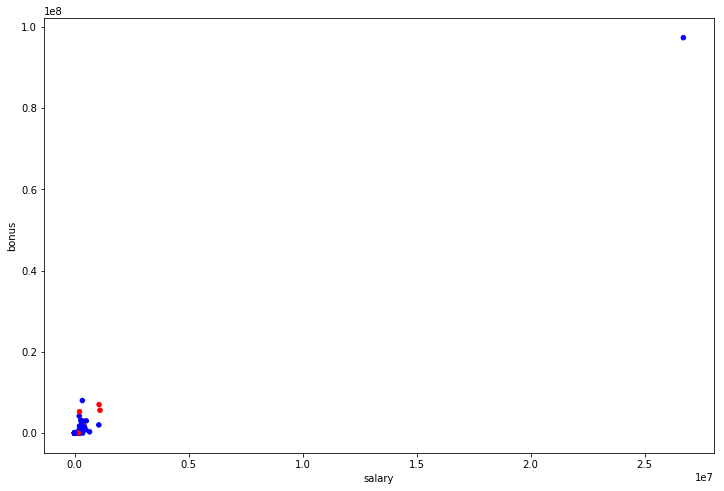

In [6]:
df = data_frame[['poi', 'salary', 'bonus']].fillna(0)
colors = {True: 'red', False: 'blue'}
df.plot.scatter(x='salary', y='bonus', c=df['poi'].apply(lambda x: colors[x]), figsize=(12,8))


clearly something is wrong here as this isn't a good representation of most of the data.   This outlier is a result of the TOTAL field which is an aggregate value for all of the data included in the data set.  This record will be dropped; if it is not removed, it will skew the analysis and the classifier.  

The record dropping process involves manually scrubbing the data for strange entries - another entry, The Travel Agency In the Park, is removed as well.  

In [7]:
drop = ('TOTAL', 'THE TRAVEL AGENCY IN THE PARK')
for name in drop:
    data_frame.drop(name, inplace=True)

With outliers removed, we can take a look at the data.  I've kept the person of interest as a feature and colored them red to see if there are any immediately observable patterns. In the upper right quadrant, we can see a pair of POIs - let's see if we can filter them out get some information on them.

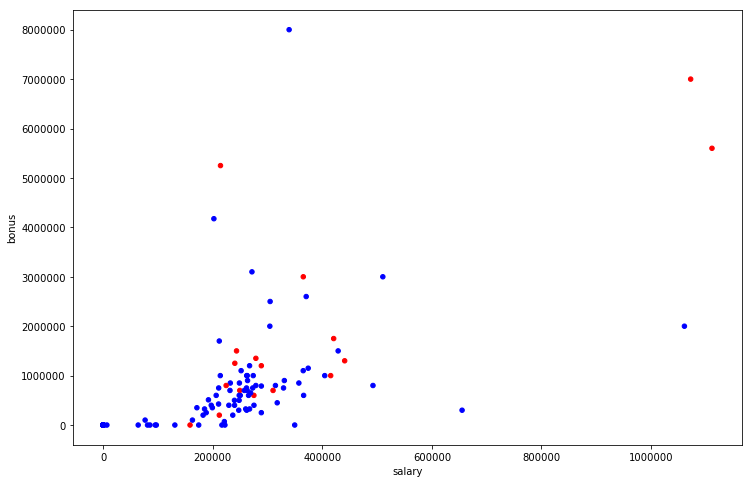

In [8]:
df = data_frame[['poi', 'salary', 'bonus']].fillna(0)
colors = {True: 'red', False: 'blue'}
df.plot.scatter(x='salary', y='bonus', c=df['poi'].apply(lambda x: colors[x]), figsize=(12,8))

A lot of people people find Ken Lay and Jeff Skilling's data to be interesting - but to be completely honest, one of the sorest thumbs to stick in the bonus vs salary chart is definitely Timothy Belden.  With the exceptions of the Ken and Jeff, Timmy's salary was a 20% of Jeffrey Skillings - but his bonuses were 4% shy of parity with Jeffrey's.  

According to Wikipedia, Timothy Belden was considered themastermind of Enron's scheme to drive up California's energy prices.

In [9]:
df[df.poi==True].sort_values('bonus', ascending=False).head(5)

,poi,salary,bonus
LAY KENNETH L,True,1072321,7000000
SKILLING JEFFREY K,True,1111258,5600000
BELDEN TIMOTHY N,True,213999,5249999
DELAINEY DAVID W,True,365163,3000000
RICE KENNETH D,True,420636,1750000


# Feature Engineering
## Feature Selection: Create new features
Along with rapid experimentation, it's a well known fact that feature engineering is the secret sauce in many successful Kaggle masters.  Proper feature engineering reflects the analysts knowledge of the subject matter and his creativity in developing explanations that may have not been previously thought of or seen.  Feature engineering, too, can include transformation of features into scaled versions that may be more relevant or easier to interpret by the machine.  For example, emails from the POI or to the POI are, maybe, better represented as percentages instead of absolute values.  If someone sent 5 e-mails to a POI but has sent 1000 emails it's very different than if someone had sent 5 emails to the POI and only 5 other emails to others - this would represent a 100x difference in significance.

In [10]:
for emp in data_dict:
    if not data_dict[emp]['from_poi_to_this_person'] == 'NaN' \
        and data_dict[emp]['from_this_person_to_poi'] == 'NaN':
        data_dict[emp]['from_ratio'] = data_dict[emp]['from_poi_to_this_person'] / data_dict[emp]['to_messages']
        data_dict[emp]['to_ratio'] = data_dict[emp]['from_this_person_to_poi'] / data_dict[emp]['from_messages']
    else:
        data_dict[emp]['from_ratio'] = 'NaN'
        data_dict[emp]['to_ratio'] = 'NaN'

## Feature Selection: Intelligently Select Features

Feature selection involves the use of human knowledge and intuition to hypothesize and test which features might uncover the hidden pattern that leads to a trend the machine can exploit.  Modern day feature selection is not only conducted manually by an operator but can be automated via machine learning as well.  It is the process where the features with the most impact are selected and then used in analysis.  Having irrelevant features in your data can decrease the accuracy of the models and make your model learn on meaningless data resulting in spurrious analysis.

Feature selection has been integrated into the pipeline.  

# Pick and Tune an Algorithm
Choice of algorithm is both the art and science of Data Science and machine learning analysis.  The choice of algorithm depends on a number of factors including but not limited to things like the size of training data, speed or training time, linearity, feature count, etc.  If the training data is very limited in scope, algorithms with high bias and low variance such as linear regression or Naive Bayes will result in more interpretable results.  With sufficient amounts of data, it's better to choose algorithms that provide greater sensitiveity through lower bias and higher variance like K-nearest, decision trees or kernel based support vector machines.

Instead of hand picking an algorithm we iterate over a number of models with param_grid sets and let GridSearchCV Optimize our model hunt.  We keep all the data and then manually select - but with machine based recommendations and scorings from SKLEARN.


In [11]:
### Extract features and labels from dataset for local testing
# Format data for ML activities
def format_and_split(data_dict, features_list):
    dataset = targetFeatureSplit(
        featureFormat(
            data_dict,
            features_list
        )
    )
    return [
        np.array(data) 
        for data in dataset
    ]

labels, features = format_and_split(data_dict, features_list)

### Helper functions 
def param_extractor(best_params_, estimator_name):
    """ 
    param_extractor extracts and formats the best hyper-parameters
    from the best_params_ attribute of GridSearchCV
    """

    if not estimator_name.endswith("__"):
        estimator_name = estimator_name + "__"
    
    return {
    k.replace(estimator_name, ""): v
    for k, v in best_params_.items()
    if k.startswith(estimator_name)
    }

def scorer(test_labels, test_predictions):
    """
    scorer generates accuracy, precision, and recall
    metrics for a given model
    """
    return dict(
        accuracy=accuracy_score(test_labels, test_predictions),
        precision=precision_score(test_labels, test_predictions),
        recall=recall_score(test_labels, test_predictions),
    )

def best_features_extractor(selector, features_list):
    best_features = []
    for kbest in selector.get_support(indices=True):
        best_features.append(features_list[1:][kbest])
    return best_features

def set_estimator_params(pipeline, best_params_):
    # Update selector params
    pipeline.steps[1][1].set_params(**param_extractor(best_params_, 'selector'))
    pipeline.steps[2][1].set_params(**param_extractor(best_params_, 'classifier'))



from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split, StratifiedShuffleSplit
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import recall_score, precision_score, accuracy_score

### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html


scaler = MinMaxScaler() # Changed from StandardScaler, MinMax 
gaussian = GaussianNB() # priors, var_smoothing
random_forest = RandomForestClassifier() # n_estimators, 
neighbors = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()
ada_boost = AdaBoostClassifier()

estimators = [{
	'name': "GaussianNB",
	'classifier': Pipeline([
		('scaler', scaler),
		('selector', SelectKBest()),
		('classifier', gaussian)
	]),
	'param_grid': {
		"selector__k": [5, 7, 9],
		"classifier__var_smoothing": np.logspace(0,-9, num=20),
	}
}, {
	'name': 'RandomForestClassifier',
	'classifier': Pipeline([
		('scaler', scaler),
		('selector', SelectKBest()),
		('classifier', random_forest)
	]),
	'param_grid': {
		"selector__k": [5, 7, 9],
		"selector_w_score_func": [f_classif, mutual_info_classif, chi2],
		"classifier__n_estimators": [110, 115, 120, 125],
		"classifier__criterion": ["gini", "entropy"],
		"classifier__min_samples_split": [2, 3, 5],
	}
}, {
	'name': 'KNeighborsClassifier',
	'classifier': Pipeline([
		('scaler', scaler),
		('selector', SelectKBest()),
		('classifier', neighbors)
	]),
	'param_grid': {
		"selector__k": [5, 7, 9],
		"selector__score_func": [f_classif, mutual_info_classif, chi2],
		"classifier__n_neighbors": [3, 5, 7, 9],
		"classifier__weights": ['uniform', 'distance'],
		"classifier__algorithm": ['ball_tree', 'kd_tree', 'brute'],
		"classifier__metric": ['minkowski', 'cityblock', 'euclidean'],
	}
}, {
	'name': 'DecisionTreeClassifier',
	'classifier': Pipeline([
		('scaler', scaler),
		('selector', SelectKBest()),
		('classifier', decision_tree)
	]),
	'param_grid': {
		"selector__k": [3, 5, 7, 9],
		"selector__score_func": [f_classif, mutual_info_classif, chi2],
		"classifier__max_leaf_nodes": [2, 3, 5, 8, 13],
		"classifier__min_samples_split": [2, 3, 4, 5, 6, 7],
	}
}, {
	'name': 'AdaBoostClassifier',
	'classifier': Pipeline([
		('scaler', scaler),
		('selector', SelectKBest()),
		('classifier', ada_boost)
	]),
	'param_grid': {
		"selector__k": [3, 5, 7, 9],
		"selector__score_func": [f_classif, mutual_info_classif, chi2],
		"classifier__n_estimators": [50, 63, 75, 86, 100],
		"classifier__learning_rate": [0.50, 0.75, 1, 1.25, 1.5],
	}
}]

# Evaluate various classifiers
print("Evaluating various classifiers.")
for index, estimator in enumerate(estimators):
	classifier = estimator['classifier']
	grid = estimator['param_grid']
	n_splits = 10
	splitter = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.25).split
	scores = {
		'accuracy': [],
		'precision': [],
		'recall': [],
	}
	for train_indices, test_indices in splitter(features, labels):
		train_features, test_features = features[train_indices], features[test_indices]
		train_labels, test_labels = labels[train_indices], labels[test_indices]
		pipe.fit(train_features, train_labels)
		score = scorer(test_labels, pipe.predict(test_features))
		scores['accuracy'].append(score['accuracy'])
		scores['precision'].append(score['precision'])
		scores['recall'].append(score['recall'])
	mean_scores = {
		'accuracy': sum(scores['accuracy']) / n_splits,
		'precision': sum(scores['precision']) / n_splits,
		'recall': sum(scores['recall']) / n_splits,
	}
	estimators[index].update({
		'mean_scores': mean_scores
	})
    ### Task 5: Tune your classifier to achieve better than .3 precision and recall 
    ### using our testing script. Check the tester.py script in the final project
    ### folder for details on the evaluation method, especially the test_classifier
    ### function. Because of the small size of the dataset, the script uses
    ### stratified shuffle split cross validation. For more info: 
    ### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

    ### Tuning has been integrated into my pipeline :-)

	param_search = GridSearchCV(classifier, param_grid=grid)
	best_params_ = param_search.fit(train_features, train_labels).best_params_
	estimators[index].update({
		"best_params_": best_params_
	})
	estimators[index].update({
		'best_estimator_': param_search.best_estimator_
	})
	estimators[index].update({
		'best_features': best_features_extractor(param_search.best_estimator_.steps[1][1], features_list),
		'best_features_mask': param_search.best_estimator_.steps[1][1].get_support() 
	})
	print("Estimator: ", estimator['name'], "scores: ", mean_scores)

print("Performing synthetic tests with stratified sampling.")
for index, estimator in enumerate(estimators):
    pipeline = estimator['best_estimator_']
    scores = {
      'accuracy': [],
      'precision': [],
      'recall': [],
    }
    n_splits = 100
    splitter = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.25).split
    for train_indices, test_indices in splitter(features, labels):
        train_features, test_features = features[train_indices], features[test_indices]
        train_labels, test_labels = labels[train_indices], labels[test_indices]
        pipeline.fit(train_features, train_labels)
        score = scorer(test_labels, pipeline.predict(test_features))
        scores['accuracy'].append(score['accuracy'])
        scores['precision'].append(score['precision'])
        scores['recall'].append(score['recall'])
    mean_scores = {
      'accuracy': sum(scores['accuracy']) / n_splits,
      'precision': sum(scores['precision']) / n_splits,
      'recall': sum(scores['recall']) / n_splits,
	  }
    print(estimator['name'], mean_scores, estimator['best_features'])



```shell
Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('selector', SelectKBest(k=5, score_func=<function f_classif at 0x7feb5dd634d0>)), ('classifier', GaussianNB(priors=None, var_smoothing=1.0))])
	Accuracy: 0.87571	Precision: 0.62264	Recall: 0.33000	F1: 0.43137	F2: 0.36424
	Total predictions: 14000	True positives:  660	False positives:  400	False negatives: 1340	True negatives: 11600

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('selector', SelectKBest(k=9, score_func=<function mutual_info_classif at 0x7feb5d3fedd0>)), ('classifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', m...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])
	Accuracy: 0.84200	Precision: 0.33540	Recall: 0.10800	F1: 0.16339	F2: 0.12494
	Total predictions: 14000	True positives:  216	False positives:  428	False negatives: 1784	True negatives: 11572

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('selector', SelectKBest(k=5, score_func=<function chi2 at 0x7feb5dd63bd0>)), ('classifier', KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='cityblock',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))])
	Accuracy: 0.84950	Precision: 0.36591	Recall: 0.07300	F1: 0.12172	F2: 0.08692
	Total predictions: 14000	True positives:  146	False positives:  253	False negatives: 1854	True negatives: 11747

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('selector', SelectKBest(k=3, score_func=<function f_classif at 0x7feb5dd634d0>)), ('classifier', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
...
          learning_rate=1.25, n_estimators=63, random_state=None))])
	Accuracy: 0.83247	Precision: 0.33918	Recall: 0.27050	F1: 0.30097	F2: 0.28192
	Total predictions: 15000	True positives:  541	False positives: 1054	False negatives: 1459	True negatives: 11946
```

# Pick and Tune an Algorithm
Choice of algorithm is both the art and science of Data Science and machine learning analysis.  The choice of algorithm depends on a number of factors including but not limited to things like the size of training data, speed or training time, linearity, feature count, etc.  If the training data is very limited in scope, algorithms with high bias and low variance such as linear regression or Naive Bayes will result in more interpretable results.  With sufficient amounts of data, it's better to choose algorithms that provide greater sensitiveity through lower bias and higher variance like K-nearest, decision trees or kernel based support vector machines.

By using the sklearn Pipeline construct instead of using manual tuning, we can use pipeline-based tuning and some basic python to help elect the best classifiers.  Synthetic tests are created prior to the final testing to ensure model quality is sufficient.  



In [14]:
# Exclusively for analysis and validation purposes.
for estimator in estimators:
    classifier = estimator['best_estimator_']
    best_features = estimator['best_features']
    
    test_classifier(
        classifier, 
        data_dict, 
        feature_list=['poi'] + best_features
    )

```shell
Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('selector', SelectKBest(k=5, score_func=<function f_classif at 0x7feb5dd634d0>)), ('classifier', GaussianNB(priors=None, var_smoothing=1.0))])
	Accuracy: 0.87571	Precision: 0.62264	Recall: 0.33000	F1: 0.43137	F2: 0.36424
	Total predictions: 14000	True positives:  660	False positives:  400	False negatives: 1340	True negatives: 11600

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('selector', SelectKBest(k=9, score_func=<function mutual_info_classif at 0x7feb5d3fedd0>)), ('classifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', m...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])
	Accuracy: 0.84200	Precision: 0.33540	Recall: 0.10800	F1: 0.16339	F2: 0.12494
	Total predictions: 14000	True positives:  216	False positives:  428	False negatives: 1784	True negatives: 11572

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('selector', SelectKBest(k=5, score_func=<function chi2 at 0x7feb5dd63bd0>)), ('classifier', KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='cityblock',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))])
	Accuracy: 0.84950	Precision: 0.36591	Recall: 0.07300	F1: 0.12172	F2: 0.08692
	Total predictions: 14000	True positives:  146	False positives:  253	False negatives: 1854	True negatives: 11747

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('selector', SelectKBest(k=3, score_func=<function f_classif at 0x7feb5dd634d0>)), ('classifier', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
...
          learning_rate=1.25, n_estimators=63, random_state=None))])
	Accuracy: 0.83247	Precision: 0.33918	Recall: 0.27050	F1: 0.30097	F2: 0.28192
	Total predictions: 15000	True positives:  541	False positives: 1054	False negatives: 1459	True negatives: 11946
```

In [ ]:
estimator = estimators[0]
best_estimator = estimator['best_estimator_']
best_features = ['poi'] + estimator['best_features']
dump_classifier_and_data(best_estimator, data_dict, best_features)

```shell
Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('selector', SelectKBest(k=5, score_func=<function f_classif at 0x7feb5dd634d0>)), ('classifier', GaussianNB(priors=None, var_smoothing=1.0))])
	Accuracy: 0.87571	Precision: 0.62264	Recall: 0.33000	F1: 0.43137	F2: 0.36424
	Total predictions: 14000	True positives:  660	False positives:  400	False negatives: 1340	True negatives: 11600
```